In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
data_chr = pd.read_csv('/content/drive/MyDrive/인공지능부트캠프/week2/charcters_stats.csv')
data_chr = data_chr.sort_values('Name')
data_chr.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [241]:
idx_best = np.argmax(data_chr['Total'],axis = 0)
print("idx : {}, Name : {}".format(idx_best, data_chr['Name'][idx_best]))

idx : 361, Name : Martian Manhunter


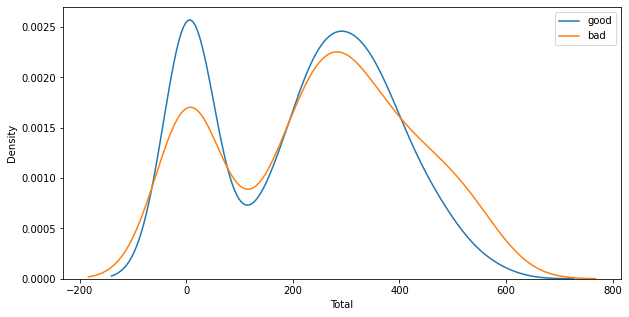

In [242]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.kdeplot(x = data_chr[data_chr['Alignment'] == 'good']['Total'], ax = ax)
sns.kdeplot(x = data_chr[data_chr['Alignment'] == 'bad']['Total'], ax = ax)

plt.legend(['good','bad'])

plt.show()

In [243]:
data_com = pd.read_csv('/content/drive/MyDrive/인공지능부트캠프/week2/marvel_characters_info.csv')
data_com.head()

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


In [244]:
id_idx = []
for i in range(len(data_com)):
    if data_com['Name'][i] in list(data_chr['Name']):
        id_idx.append(i)

In [245]:
data_com = data_com.iloc[id_idx,:]

In [246]:
data_com = data_com[['Name','Publisher']]


In [247]:
data_com.head()

,Name,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics


In [248]:
data = pd.merge(data_chr, data_com, on='Name', how='inner')

In [249]:
data['Publisher'].dropna()

0          Marvel Comics
1      Dark Horse Comics
2              DC Comics
3          Marvel Comics
4          Marvel Comics
             ...        
595        Marvel Comics
596        Marvel Comics
597        Marvel Comics
598            DC Comics
599            DC Comics
Name: Publisher, Length: 593, dtype: object

In [250]:
data.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
1,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
2,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
3,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
4,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics


In [251]:
mean_data = data['Total'].groupby(data['Publisher']).mean()

In [252]:
print(mean_data.sort_values(ascending= False))

Publisher
Shueisha             481.500000
Microsoft            425.000000
Sony Pictures        398.000000
DC Comics            253.436047
Marvel Comics        243.851003
Universal Studios    237.000000
Dark Horse Comics    196.875000
SyFy                 188.800000
ABC Studios          166.000000
Icon Comics          148.000000
NBC - Heroes         140.526316
Image Comics          70.615385
Wildstorm              5.000000
Team Epic TV           5.000000
HarperCollins          5.000000
Hanna-Barbera          5.000000
Name: Total, dtype: float64


In [253]:
print(data_chr['Total'].groupby(data_chr['Alignment']).mean())
print(data_chr['Total'].groupby(data_chr['Alignment']).sum())
print(data_chr['Total'].groupby(data_chr['Alignment']).count())

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64
Alignment
bad        40790
good       92876
neutral     3909
Name: Total, dtype: int64
Alignment
bad        165
good       432
neutral     11
Name: Total, dtype: int64


In [254]:
mean_data = data_chr['Total'].groupby(data_chr['Alignment']).mean()
sum_data = data_chr['Total'].groupby(data_chr['Alignment']).sum()
count_data = data_chr['Total'].groupby(data_chr['Alignment']).count()

In [255]:
gn_sum = sum_data[1] + sum_data[2]
gn_count = count_data[1] + count_data[2]
gn_mean = gn_sum / gn_count
print(gn_mean)

218.4762979683973


In [256]:
if mean_data[0] > gn_mean:
    print('bad win')
else:
    print('godd, neutral win')

bad win
